In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re



In [149]:
df = pd.read_excel('Book1.xlsx',engine='openpyxl')
df.head()



,Unit Link,Pictures,price,Room,bathrooms,area,Offer,Description,Property Type,Offer Type,Reference Number,Building Status,fretiter,date add,owership,Company,Agent,Compound Name,State,City
0,https://www.bayut.eg/%D8%AA%D9%81%D8%A7%D8%B5%...,['https://bayut-eg-production.s3.amazonaws.com...,14000000 EG,5غرفه,2حمام,154 متر,شقة للبيع 154م في كمبوند جاردن ليكس Garden lak...,Garden Lakes - Hydeparkشقة مميزة للبيع في كمبو...,شقة,للبيع,بيوت - 6139-bV2TQl,قيد الإنشاء,NaN,5 أكتوبر 2024,أول سكن,Platinum Real Estate,Platinum,جاردن ليكس,6 أكتوبر,الجيزة
1,https://www.bayut.eg/%D8%AA%D9%81%D8%A7%D8%B5%...,['https://bayut-eg-production.s3.amazonaws.com...,13000000 EG,6غرفه,2حمام,218 متر,شقة بالروف للبيع بموقع متميز بكومباوند تاج سيت...,التفاصيلشقة بالروف للبيع بموقع متميز بكومباوند...,شقة,للبيع,بيوت - farahtajcity,قيد الإنشاء,غير المفروشة,2 أكتوبر 2024,أول سكن,Lacerta Real Estate,Farah,كومباوند تاج سيتي,القاهرة الجديدة,القاهرة
2,https://www.bayut.eg/%D8%AA%D9%81%D8%A7%D8%B5%...,['https://bayut-eg-production.s3.amazonaws.com...,7320000 EG,6غرفه,1حمام,72 متر,استوديو للبيع بكمبوند جاردن ليكس فيو مميز باقل...,استوديو للبيع بكمبوند جاردن ليكس فيو مميز باقل...,شقة,للبيع,بيوت - HT,قيد الإنشاء,المفروشة,2 أكتوبر 2024,اعادة البيع,اووك ريل استيت,Oak real estate,جاردن ليكس,6 أكتوبر,الجيزة
3,https://www.bayut.eg/%D8%AA%D9%81%D8%A7%D8%B5%...,['https://bayut-eg-production.s3.amazonaws.com...,14632930 EG,3غرفه,5حمام,286 متر,توين هاوس للبيع في كمبوند زايد الجديده,للبيع في V. Levels، الشيخ زايد الجديدةتفاصيل ا...,توين هاوس,للبيع,بيوت - 068,قيد الإنشاء,غير المفروشة,2 أكتوبر 2024,أول سكن,Royal Hills,Royal Hills,كومباوند زايد الجديدة,الشيخ زايد,الجيزة
4,https://www.bayut.eg/%D8%AA%D9%81%D8%A7%D8%B5%...,['https://bayut-eg-production.s3.amazonaws.com...,6800000 EG,6غرفه,1حمام,40 متر,استلام فوري علي النيل مباشره بارده فندق عالمي ...,للتواصل مع المبيعات :عرض معلومات الاتصالwhatsa...,شقة,للبيع,بيوت - 5000329-CfzrMP,جاهز,غير المفروشة,2 أكتوبر 2024,أول سكن,Modern Cairo,Mohamed Abdallah,ريف دو نيل,المعادي,القاهرة


In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48882 entries, 0 to 48881
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unit Link         48876 non-null  object
 1   Pictures          48876 non-null  object
 2   price             48876 non-null  object
 3   Room              48882 non-null  object
 4   bathrooms         48876 non-null  object
 5   area              48876 non-null  object
 6   Offer             48871 non-null  object
 7   Description       48876 non-null  object
 8   Property Type     48876 non-null  object
 9   Offer Type        48876 non-null  object
 10  Reference Number  48876 non-null  object
 11  Building Status   48876 non-null  object
 12  fretiter          36506 non-null  object
 13  date add          48824 non-null  object
 14  owership          48876 non-null  object
 15  Company           48875 non-null  object
 16  Agent             48875 non-null  object
 17  Compound Nam

In [151]:
df = df.drop_duplicates()

In [152]:
df.isna().sum()

Unit Link               4
Pictures                4
price                   4
Room                    0
bathrooms               4
area                    4
Offer                   9
Description             4
Property Type           4
Offer Type              4
Reference Number        4
Building Status         4
fretiter            12374
date add               56
owership                4
Company                 5
Agent                   5
Compound Name           4
State                7100
City                    5
dtype: int64

In [153]:
for column in df.columns:
    mode_value = df[column].mode()[0] 
    df[column] = df[column].fillna(mode_value)  

In [154]:
df.isna().sum()

Unit Link           0
Pictures            0
price               0
Room                0
bathrooms           0
area                0
Offer               0
Description         0
Property Type       0
Offer Type          0
Reference Number    0
Building Status     0
fretiter            0
date add            0
owership            0
Company             0
Agent               0
Compound Name       0
State               0
City                0
dtype: int64

In [155]:

column_translation = {
    'نوع العقار': 'Property Type',
    'نوع العرض': 'Offer Type',
    'الرقم المرجعي': 'Reference Number',
    'حالة البناء': 'Building Status',
    'التأثيث': 'Furnishing',
    'تاريخ الإضافة': 'Date Added',
    'الملكية العقارية': 'Ownership',
    'price':'Price',
    'Room':'Rooms',
    'bathrooms': 'Bathrooms',
    'area':'Area',
    'date add':'Date Added'
}
df.rename(columns=column_translation, inplace=True)

numeric_columns = ['Price', 'Rooms', 'Bathrooms', 'Area']
for col in numeric_columns:
    df[col] = df[col].apply(
        lambda value: int(re.findall(r'\d+', str(value).replace(',', ''))[0]) if pd.notna(value) and re.findall(r'\d+', str(value).replace(',', '')) else None
    )



In [156]:
df = df.drop(['Unit Link', 'Pictures', 'Reference Number', 'Agent'], axis=1)
df.head()

,Price,Rooms,Bathrooms,Area,Offer,Description,Property Type,Offer Type,Building Status,fretiter,Date Added,owership,Company,Compound Name,State,City
0,14000000,5,2,154,شقة للبيع 154م في كمبوند جاردن ليكس Garden lak...,Garden Lakes - Hydeparkشقة مميزة للبيع في كمبو...,شقة,للبيع,قيد الإنشاء,غير المفروشة,5 أكتوبر 2024,أول سكن,Platinum Real Estate,جاردن ليكس,6 أكتوبر,الجيزة
1,13000000,6,2,218,شقة بالروف للبيع بموقع متميز بكومباوند تاج سيت...,التفاصيلشقة بالروف للبيع بموقع متميز بكومباوند...,شقة,للبيع,قيد الإنشاء,غير المفروشة,2 أكتوبر 2024,أول سكن,Lacerta Real Estate,كومباوند تاج سيتي,القاهرة الجديدة,القاهرة
2,7320000,6,1,72,استوديو للبيع بكمبوند جاردن ليكس فيو مميز باقل...,استوديو للبيع بكمبوند جاردن ليكس فيو مميز باقل...,شقة,للبيع,قيد الإنشاء,المفروشة,2 أكتوبر 2024,اعادة البيع,اووك ريل استيت,جاردن ليكس,6 أكتوبر,الجيزة
3,14632930,3,5,286,توين هاوس للبيع في كمبوند زايد الجديده,للبيع في V. Levels، الشيخ زايد الجديدةتفاصيل ا...,توين هاوس,للبيع,قيد الإنشاء,غير المفروشة,2 أكتوبر 2024,أول سكن,Royal Hills,كومباوند زايد الجديدة,الشيخ زايد,الجيزة
4,6800000,6,1,40,استلام فوري علي النيل مباشره بارده فندق عالمي ...,للتواصل مع المبيعات :عرض معلومات الاتصالwhatsa...,شقة,للبيع,جاهز,غير المفروشة,2 أكتوبر 2024,أول سكن,Modern Cairo,ريف دو نيل,المعادي,القاهرة


In [157]:
df.rename(columns={'owership': 'Ownership'}, inplace=True)


In [158]:
df['Property Type'].unique()

array(['شقة', 'توين هاوس', 'شاليه', 'فيلا', 'تاون هاوس', 'بنتهاوس',
       'دوبلكس', 'شقة فندقية', 'غرفة', 'اي فيلا', 'عقارات سكنية اخرى',
       'كبينة', 'أرض سكنية'], dtype=object)

In [159]:
df['Ownership'].unique()

array(['أول سكن', 'اعادة البيع', '1 أكتوبر 2024', 0, '2 أكتوبر 2024'],
      dtype=object)

In [160]:
df['Ownership'] = df['Ownership'].apply(lambda x: 'First Residence' if x == 'أول سكن' else 'Resale')

df['Ownership'].unique()


array(['First Residence', 'Resale'], dtype=object)

In [161]:
translation_map = {
    'للبيع': 'for sale'
}
df['Offer Type'].replace(translation_map , inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_27156\3836827520.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Offer Type'].replace(translation_map , inplace=True)


In [162]:
translation_map = {
    'جاهز': 'ready'
    ,
    'قيد الإنشاء' : 'under construction'
}
df['Building Status'].replace(translation_map , inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_27156\38348962.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Building Status'].replace(translation_map , inplace=True)


In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48880 entries, 0 to 48881
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Price            48880 non-null  int64 
 1   Rooms            48880 non-null  int64 
 2   Bathrooms        48880 non-null  int64 
 3   Area             48880 non-null  int64 
 4   Offer            48880 non-null  object
 5   Description      48880 non-null  object
 6   Property Type    48880 non-null  object
 7   Offer Type       48880 non-null  object
 8   Building Status  48880 non-null  object
 9   fretiter         48880 non-null  object
 10  Date Added       48880 non-null  object
 11  Ownership        48880 non-null  object
 12  Company          48880 non-null  object
 13  Compound Name    48880 non-null  object
 14  State            48880 non-null  object
 15  City             48880 non-null  object
dtypes: int64(4), object(12)
memory usage: 6.3+ MB


In [164]:
property_type_mapping = {
    'شقة': 'Apartment',
    'توين هاوس': 'Twin House',
    'شاليه': 'Chalet',
    'فیلا': 'Villa',
    'تاون هاوس': 'Townhouse',
    'بنتهاوس': 'Penthouse',
    'دوبلكس': 'Duplex',
    'شقة فندقية': 'Hotel Apartment',
    'غرفة': 'Room',
    'اي فيلا': 'E-Villa',
    'عقارات سكنية اخرى': 'Other Residential',
    'كبينة': 'Cabin',
    'أرض سكنية': 'Residential Land',
}

df['Property Type'] = df['Property Type'].map(property_type_mapping)

df['Property Type'] = df['Property Type'].fillna(df['Property Type'].mode()[0])

print(df['Property Type'].unique())


['Apartment' 'Twin House' 'Chalet' 'Townhouse' 'Penthouse' 'Duplex'
 'Hotel Apartment' 'Room' 'E-Villa' 'Other Residential' 'Cabin'
 'Residential Land']


In [165]:
df.drop(columns=['Offer Type'] , axis = 1 , inplace= True)

In [166]:
df.head(1)

,Price,Rooms,Bathrooms,Area,Offer,Description,Property Type,Building Status,fretiter,Date Added,Ownership,Company,Compound Name,State,City
0,14000000,5,2,154,شقة للبيع 154م في كمبوند جاردن ليكس Garden lak...,Garden Lakes - Hydeparkشقة مميزة للبيع في كمبو...,Apartment,under construction,غير المفروشة,5 أكتوبر 2024,First Residence,Platinum Real Estate,جاردن ليكس,6 أكتوبر,الجيزة


In [167]:
df.rename(columns={'fretiter': 'Furnishing'}, inplace=True)


In [168]:
df['Furnishing'] = df['Furnishing'].apply(lambda x: 'مفروشة' if x != 'غير المفروشة' else 'غير المفروشة')

furnishing_mapping = {
    'مفروشة': 'Furnished',
    'غير المفروشة': 'Unfurnished'
}

df['Furnishing'] = df['Furnishing'].map(furnishing_mapping)

print(df['Furnishing'].unique())


['Unfurnished' 'Furnished']


In [169]:
city_mapping = {
    'الجيزة': 'Giza',
    'القاهرة': 'Cairo',
    'مطروح': 'Matrouh',
    'البحر الأحمر': 'Red Sea',
    'السويس': 'Suez',
    'الإسكندرية': 'Alexandria',
    'الدقهلية': 'Dakahlia',
    'جنوب سيناء': 'South Sinai',
    'كفر الشيخ': 'Kafr El Sheikh',
    'دمياط': 'Damietta',
    'أسيوط': 'Assiut',
    'سوهاج': 'Sohag',
    'الشرقية': 'Sharqia',
    'الإسماعيلية': 'Ismailia'
}

df['City'] = df['City'].map(city_mapping)




In [170]:
df.head()

,Price,Rooms,Bathrooms,Area,Offer,Description,Property Type,Building Status,Furnishing,Date Added,Ownership,Company,Compound Name,State,City
0,14000000,5,2,154,شقة للبيع 154م في كمبوند جاردن ليكس Garden lak...,Garden Lakes - Hydeparkشقة مميزة للبيع في كمبو...,Apartment,under construction,Unfurnished,5 أكتوبر 2024,First Residence,Platinum Real Estate,جاردن ليكس,6 أكتوبر,Giza
1,13000000,6,2,218,شقة بالروف للبيع بموقع متميز بكومباوند تاج سيت...,التفاصيلشقة بالروف للبيع بموقع متميز بكومباوند...,Apartment,under construction,Unfurnished,2 أكتوبر 2024,First Residence,Lacerta Real Estate,كومباوند تاج سيتي,القاهرة الجديدة,Cairo
2,7320000,6,1,72,استوديو للبيع بكمبوند جاردن ليكس فيو مميز باقل...,استوديو للبيع بكمبوند جاردن ليكس فيو مميز باقل...,Apartment,under construction,Furnished,2 أكتوبر 2024,Resale,اووك ريل استيت,جاردن ليكس,6 أكتوبر,Giza
3,14632930,3,5,286,توين هاوس للبيع في كمبوند زايد الجديده,للبيع في V. Levels، الشيخ زايد الجديدةتفاصيل ا...,Twin House,under construction,Unfurnished,2 أكتوبر 2024,First Residence,Royal Hills,كومباوند زايد الجديدة,الشيخ زايد,Giza
4,6800000,6,1,40,استلام فوري علي النيل مباشره بارده فندق عالمي ...,للتواصل مع المبيعات :عرض معلومات الاتصالwhatsa...,Apartment,ready,Unfurnished,2 أكتوبر 2024,First Residence,Modern Cairo,ريف دو نيل,المعادي,Cairo


In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48880 entries, 0 to 48881
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Price            48880 non-null  int64 
 1   Rooms            48880 non-null  int64 
 2   Bathrooms        48880 non-null  int64 
 3   Area             48880 non-null  int64 
 4   Offer            48880 non-null  object
 5   Description      48880 non-null  object
 6   Property Type    48880 non-null  object
 7   Building Status  48880 non-null  object
 8   Furnishing       48880 non-null  object
 9   Date Added       48880 non-null  object
 10  Ownership        48880 non-null  object
 11  Company          48880 non-null  object
 12  Compound Name    48880 non-null  object
 13  State            48880 non-null  object
 14  City             48880 non-null  object
dtypes: int64(4), object(11)
memory usage: 6.0+ MB


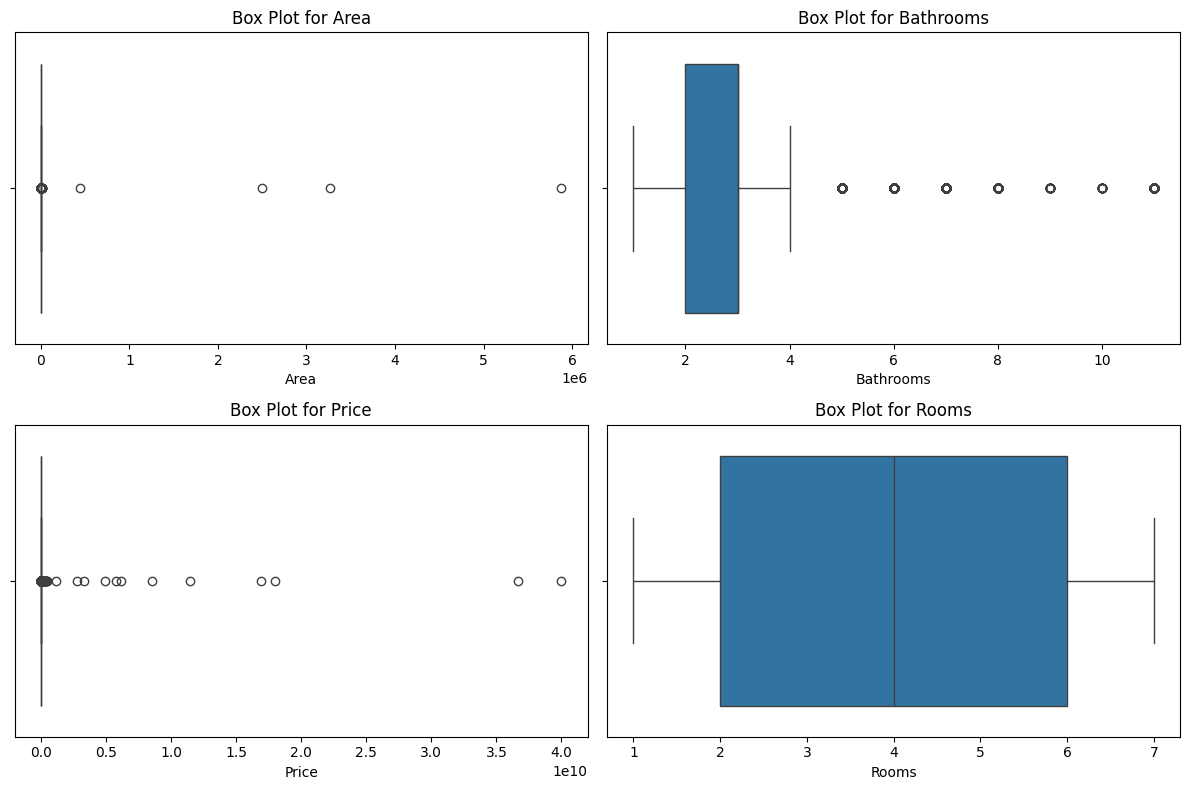

In [172]:
columns_to_plot = ['Area', 'Bathrooms', 'Price' , 'Rooms']

plt.figure(figsize=(12, 8))

for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot for {col}')

plt.tight_layout()
plt.show()


In [173]:
def replace_outliers_with_fence(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_fence = Q1 - 1.5 * IQR
    upper_fence = Q3 + 1.5 * IQR
    df[column] = df[column].apply(lambda x: lower_fence if x < lower_fence else x)
    df[column] = df[column].apply(lambda x: upper_fence if x > upper_fence else x)
    return df

columns_to_check = ['Area', 'Bathrooms', 'Price']
df[columns_to_check] = df[columns_to_check].apply(lambda col: col.fillna(col.median()))


for col in columns_to_check:
    df = replace_outliers_with_fence(df, col)


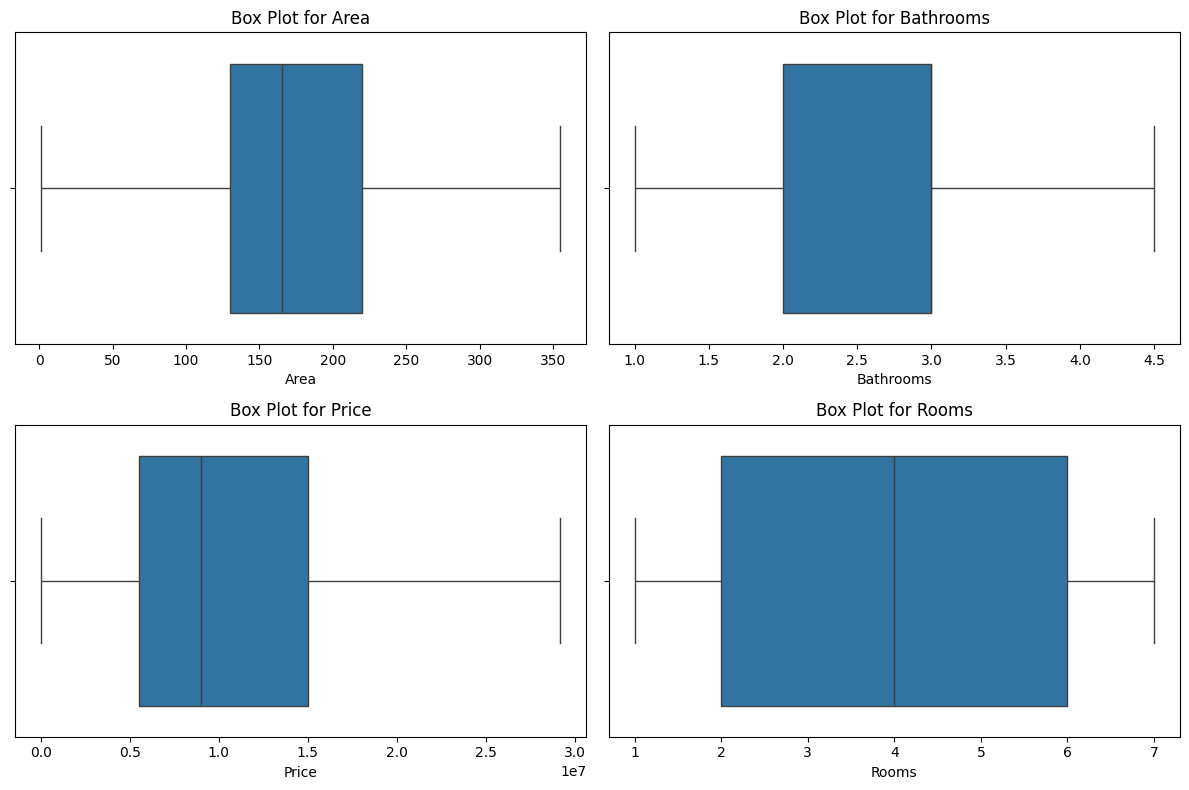

In [174]:
columns_to_plot = ['Area', 'Bathrooms','Price','Rooms']

plt.figure(figsize=(12, 8))

for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot for {col}')

plt.tight_layout()
plt.show()


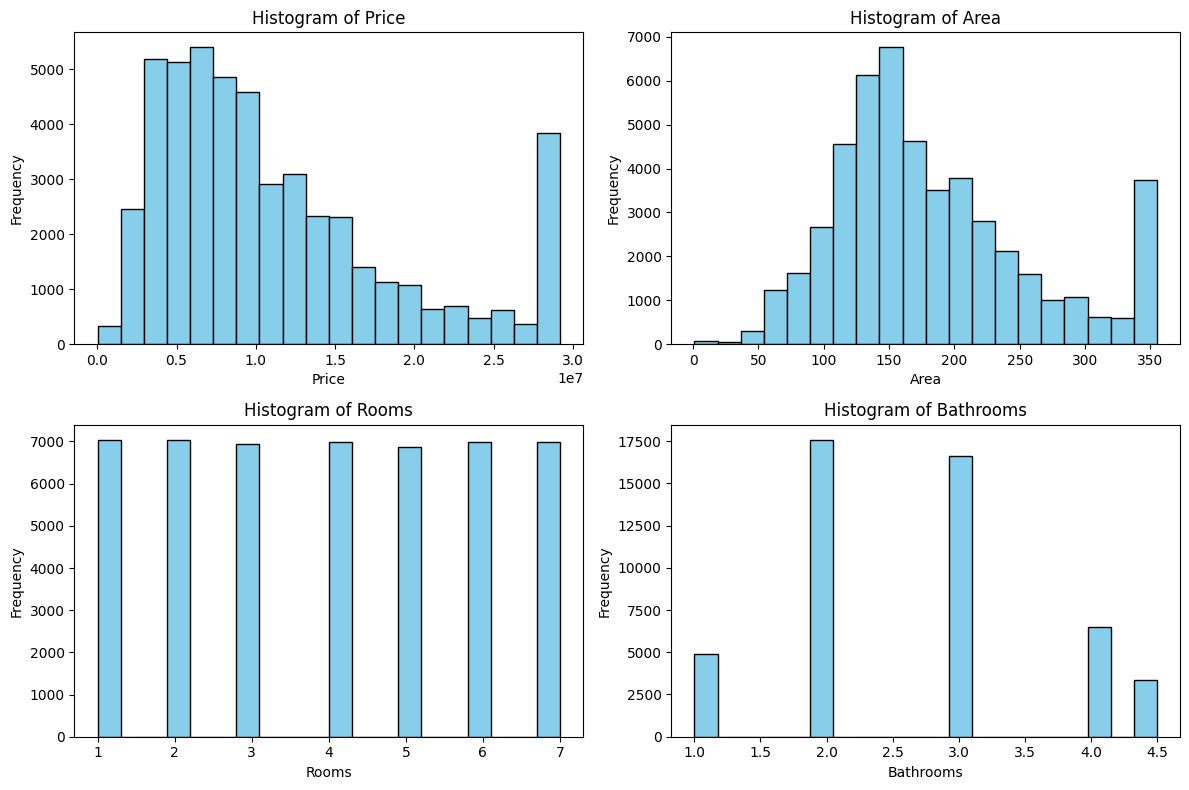

In [175]:
columns_to_plot = ['Price', 'Area', 'Rooms', 'Bathrooms']

plt.figure(figsize=(12, 8))
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(2, 2, i)  # Create a 2x2 grid and select the i-th subplot
    plt.hist(df[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


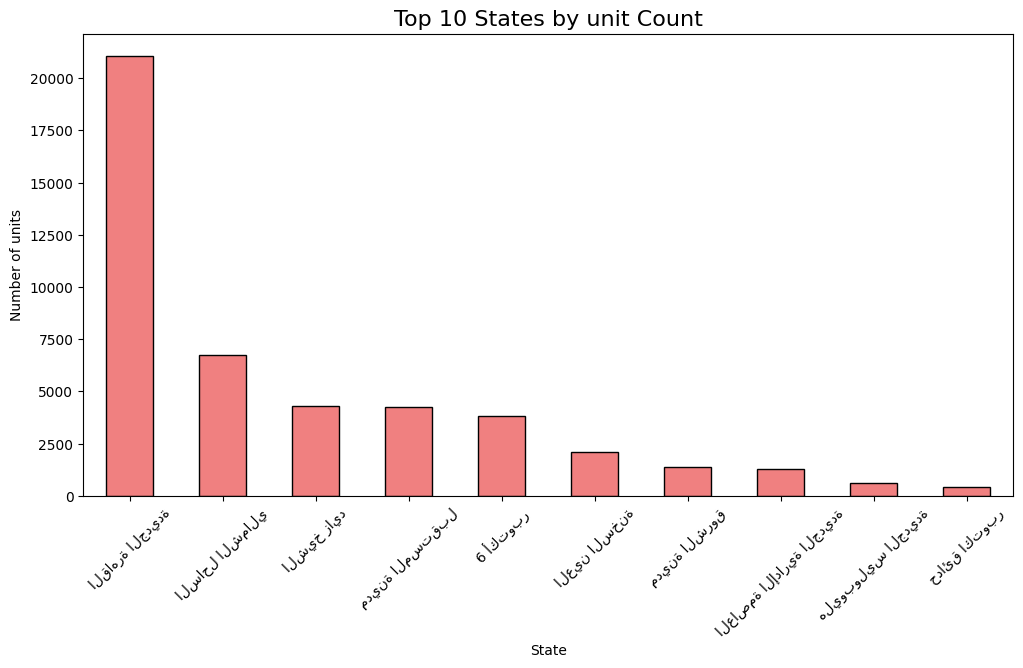

In [176]:


state_counts = df['State'].value_counts().head(10)
plt.figure(figsize=(12, 6))
state_counts.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Top 10 States by unit Count', fontsize=16)
plt.xlabel('State')
plt.ylabel('Number of units')
plt.xticks(rotation=45)
plt.show()


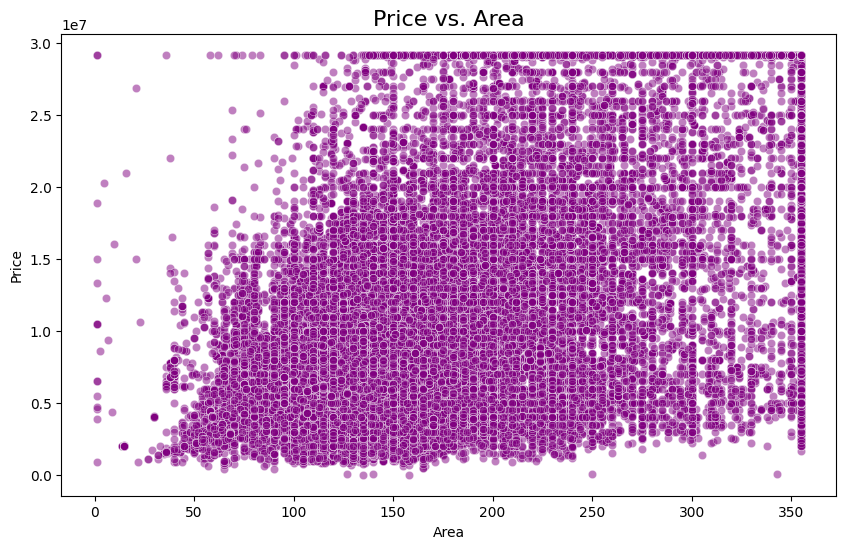

In [177]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Area', y='Price', data=df, alpha=0.5, color='purple')
plt.title('Price vs. Area', fontsize=16)
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()


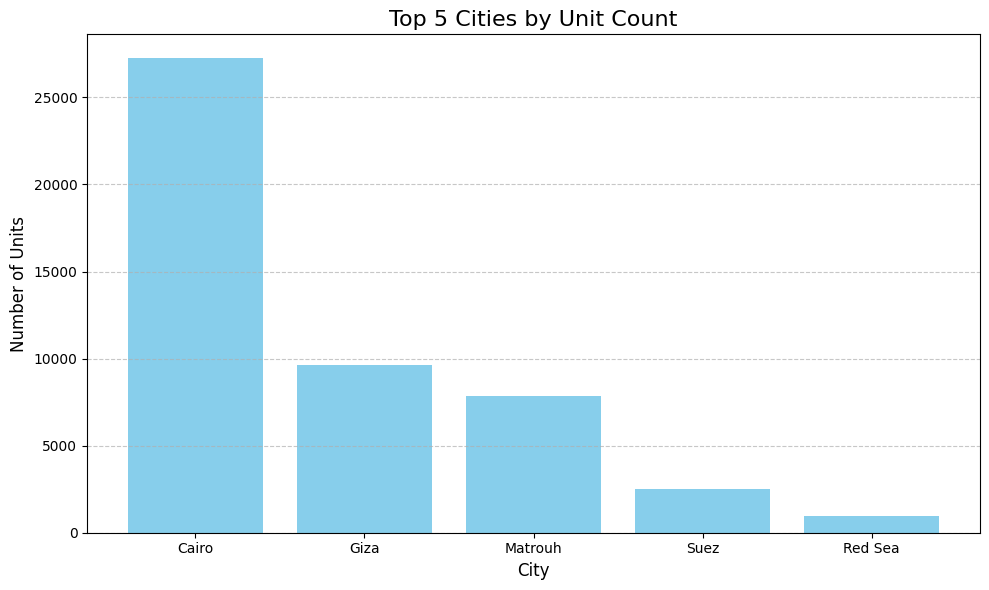

In [178]:

city_counts = df.groupby('City').size().reset_index(name='Units')

top_cities = city_counts.sort_values(by='Units', ascending=False).head(5)

plt.figure(figsize=(10, 6))

plt.bar(top_cities['City'], top_cities['Units'], color='skyblue')

plt.title('Top 5 Cities by Unit Count', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Number of Units', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

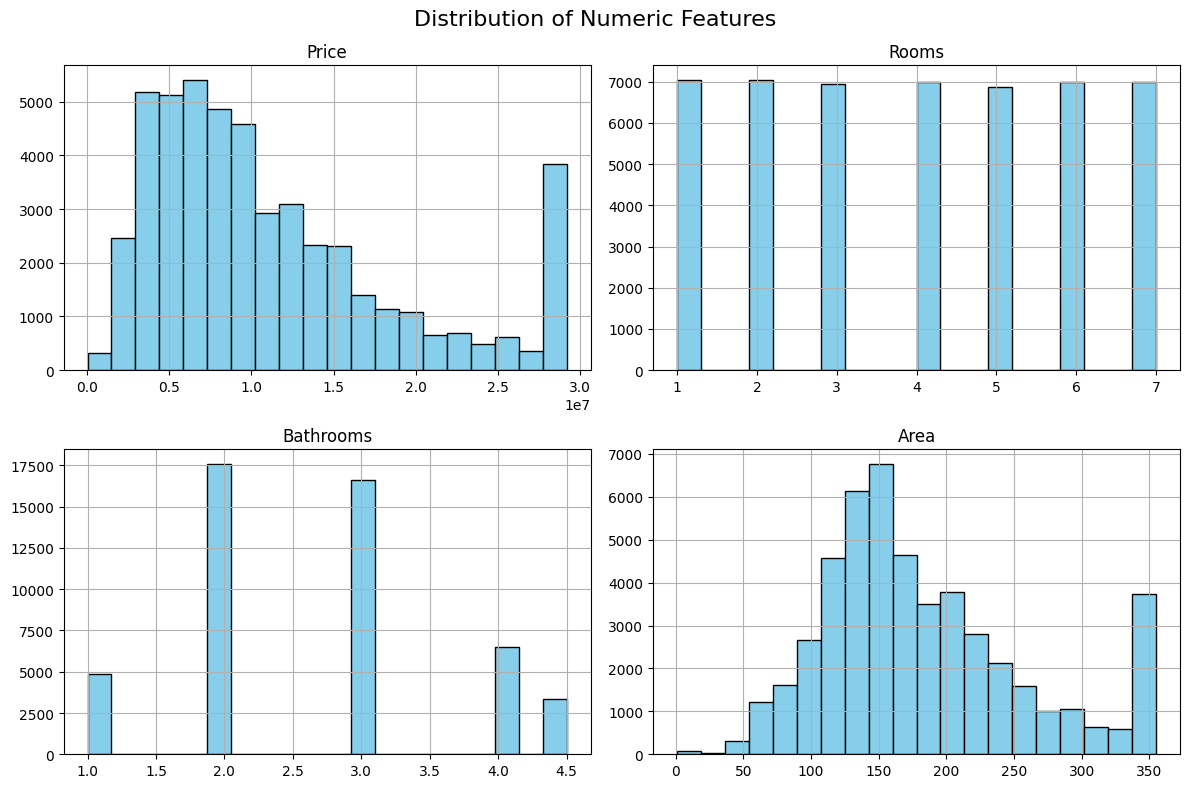

In [179]:

df.head()

numeric_features = ['Price', 'Rooms', 'Bathrooms', 'Area']
df[numeric_features].hist(bins=20, figsize=(12, 8), color='skyblue', edgecolor='black')
plt.suptitle('Distribution of Numeric Features', fontsize=16)
plt.tight_layout()
plt.show()

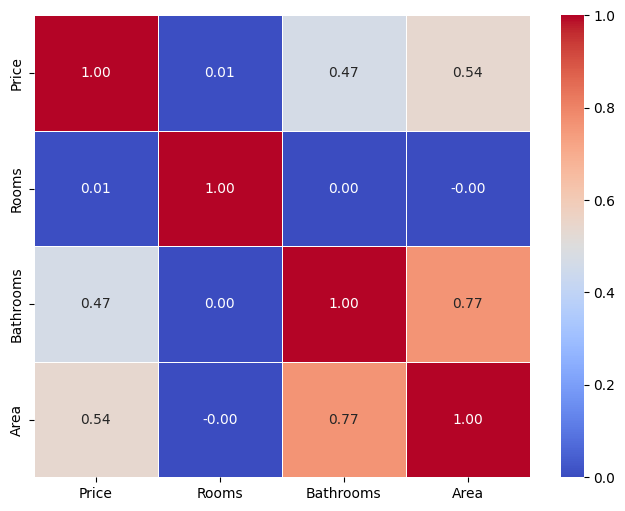

In [180]:

selected_columns = df[[ df.columns[0], df.columns[1], df.columns[2], df.columns[3]]]

corr = selected_columns.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()


#Regex




In [181]:

pattern = r"(?<=\bمميزات\s)(.*)"

df_with_features = df[df["Description"].str.contains(r"\bمميزات\b", flags=re.IGNORECASE, na=False)]

df_with_features["features_extracted"] = df_with_features["Description"].apply(
    lambda x: re.search(pattern, x).group(1).strip() if re.search(pattern, x) else ""
)



C:\Users\DELL\AppData\Local\Temp\ipykernel_27156\736139278.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_features["features_extracted"] = df_with_features["Description"].apply(


In [182]:
df_with_features.head()

,Price,Rooms,Bathrooms,Area,Offer,Description,Property Type,Building Status,Furnishing,Date Added,Ownership,Company,Compound Name,State,City,features_extracted
20,5250000.0,6,3.0,230.0,امتلك شقة 230م باقل سعر وتسهيلات في اللوتس الج...,شقة للبيع في زهرة اللوتس الجديدةوبتسهيلات فى ا...,Apartment,under construction,Unfurnished,3 أكتوبر 2024,First Residence,Golden Point,اللوتس,القاهرة الجديدة,Cairo,الموقع ?* اكثر مواقع اللوتس تميزا وتطل على فيو...
23,6612000.0,4,3.0,229.0,شقة مميزة للبيع في بيت الوطن التجمع الخامس,شقة مميزة للبيع في بيت الوطن التجمع الخامس علي...,Apartment,ready,Unfurnished,3 أكتوبر 2024,Resale,Capital Lords,بيت الوطن,القاهرة الجديدة,Cairo,بيت الوطن التجمع الخامسأفضل أنظمة سداد بالتجمع...
27,4950000.0,6,3.0,228.0,امتلك شقة 230 متر في الدور الثالث باللوتس الجديدة,شقة للبيع في زهرة اللوتس الجديدةوبتسهيلات فى ا...,Apartment,under construction,Unfurnished,3 أكتوبر 2024,First Residence,Golden Point,اللوتس,القاهرة الجديدة,Cairo,الموقع ?* اكثر مواقع اللوتس تميزا وتطل على فيو...
30,3221500.0,2,3.0,170.0,استلم شقتك دلوقتي في اميز مناطق العاصمه الادار...,استلم شقتك دلوقتي في اميز مناطق العاصمه الادار...,Apartment,ready,Unfurnished,3 أكتوبر 2024,First Residence,deal,ميدتاون كوندو,العاصمة الإدارية الجديدة,Cairo,المشروع:**- أول كومبوند وأول مول سيتم تسليمه و...
32,5150000.0,2,3.0,220.0,امتلك شقة 220 متر بحديقة 160 متر باللوتس الجديدة,شقة للبيع في زهرة اللوتس الجديدةوبتسهيلات فى ا...,Apartment,under construction,Unfurnished,3 أكتوبر 2024,First Residence,Golden Point,اللوتس,القاهرة الجديدة,Cairo,الموقع ?* اكثر مواقع اللوتس تميزا وتطل على فيو...


In [183]:

pattern = r"\b(?:قسط|تقسيط)\b\s*(.*)"

df_with_payment_terms = df[df["Offer"].str.contains(r"\b(?:قسط|تقسيط)\b", flags=re.IGNORECASE, na=False)]

df_with_payment_terms["payment_terms_extracted"] = df_with_payment_terms["Offer"].apply(
    lambda x: re.search(pattern, x, flags=re.IGNORECASE).group(1).strip() if re.search(pattern, x, flags=re.IGNORECASE) else ""
)



C:\Users\DELL\AppData\Local\Temp\ipykernel_27156\2701917065.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_payment_terms["payment_terms_extracted"] = df_with_payment_terms["Offer"].apply(


In [184]:
df_with_payment_terms.head()

,Price,Rooms,Bathrooms,Area,Offer,Description,Property Type,Building Status,Furnishing,Date Added,Ownership,Company,Compound Name,State,City,payment_terms_extracted
15,15000000.0,2,3.0,212.0,بالقرب من مدينتي فيلا بيع 3 غرف قسط 8 سنين,طرح مرحله جديدهأس فيلا للبيع في كمبوند BUTTER...,Apartment,ready,Unfurnished,3 أكتوبر 2024,First Residence,Persona,مدينتي,القاهرة الجديدة,Cairo,8 سنين
48,12215527.0,5,3.0,149.0,شقة استلام فوري 149م متشطبة زايد اكتوبر مقدم 2...,شقة استلام فوري 149م متشطبة زايد اكتوبر مقدم 2...,Apartment,ready,Furnished,3 أكتوبر 2024,First Residence,iL D'ORO Real Estate,الشيخ زايد,القاهرة الجديدة,Giza,4 سنوات
75,3620000.0,2,2.0,80.0,شاليه للبيع 2نوم متشطب بالفرش لقطه+تقسيط 7 سنين,شاليه للبيع 2نوم متشطب بالفرش لقطه+تقسيط 7 سني...,Chalet,under construction,Unfurnished,4 أكتوبر 2024,First Residence,Home Locator,بيلا رومانس,العين السخنة,Suez,7 سنين
109,29191500.0,2,4.5,300.0,توين هاوس استلام فوري يطل علي الاهرامات - قسط ...,توين هاوس في كومبوند صن كابيتالتقسيط علي 6 سنو...,Apartment,under construction,Unfurnished,4 أكتوبر 2024,First Residence,Egypt Hills,صن كابيتال,حدائق اكتوبر,Giza,6 سنوات
118,6006550.0,3,2.0,116.0,شقة متشطبة بالتكيفات - لاند اسكيب فيو - قسط يص...,شقة متشطبة بالتكيفات للبيع في أو ويست 6 أكتوبر...,Apartment,under construction,Unfurnished,4 أكتوبر 2024,First Residence,Egypt Hills,كومباوند او ويست,6 أكتوبر,Giza,يصل الي ? سنوات


In [185]:

df_with_payment_terms = df.copy()

df_with_payment_terms["immediate_delivery"] = df_with_payment_terms["Offer"].str.contains(
    r"\bاستلام فوري\b", flags=re.IGNORECASE, na=False
)


In [186]:
df_with_payment_terms.head(1)

,Price,Rooms,Bathrooms,Area,Offer,Description,Property Type,Building Status,Furnishing,Date Added,Ownership,Company,Compound Name,State,City,immediate_delivery
0,14000000.0,5,2.0,154.0,شقة للبيع 154م في كمبوند جاردن ليكس Garden lak...,Garden Lakes - Hydeparkشقة مميزة للبيع في كمبو...,Apartment,under construction,Unfurnished,5 أكتوبر 2024,First Residence,Platinum Real Estate,جاردن ليكس,6 أكتوبر,Giza,False


In [187]:
df = df.drop(['Offer'	,'Description'], axis=1)


In [188]:
df.head(1)

,Price,Rooms,Bathrooms,Area,Property Type,Building Status,Furnishing,Date Added,Ownership,Company,Compound Name,State,City
0,14000000.0,5,2.0,154.0,Apartment,under construction,Unfurnished,5 أكتوبر 2024,First Residence,Platinum Real Estate,جاردن ليكس,6 أكتوبر,Giza


In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48880 entries, 0 to 48881
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Price            48880 non-null  float64
 1   Rooms            48880 non-null  int64  
 2   Bathrooms        48880 non-null  float64
 3   Area             48880 non-null  float64
 4   Property Type    48880 non-null  object 
 5   Building Status  48880 non-null  object 
 6   Furnishing       48880 non-null  object 
 7   Date Added       48880 non-null  object 
 8   Ownership        48880 non-null  object 
 9   Company          48880 non-null  object 
 10  Compound Name    48880 non-null  object 
 11  State            48880 non-null  object 
 12  City             48880 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 5.2+ MB


In [190]:
df = df.drop(columns=["Company", "Compound Name", "State" , "Date Added"])

In [191]:
object_columns = df.select_dtypes(include=["object"]).columns
object_columns

Index(['Property Type', 'Building Status', 'Furnishing', 'Ownership', 'City'], dtype='object')

In [192]:
prefix_dict = {col: col for col in object_columns}

# Apply one-hot encoding with the prefix dictionary
df_encoded = pd.get_dummies(df, columns=object_columns, prefix=prefix_dict)



In [193]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48880 entries, 0 to 48881
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Price                               48880 non-null  float64
 1   Rooms                               48880 non-null  int64  
 2   Bathrooms                           48880 non-null  float64
 3   Area                                48880 non-null  float64
 4   Property Type_Apartment             48880 non-null  bool   
 5   Property Type_Cabin                 48880 non-null  bool   
 6   Property Type_Chalet                48880 non-null  bool   
 7   Property Type_Duplex                48880 non-null  bool   
 8   Property Type_E-Villa               48880 non-null  bool   
 9   Property Type_Hotel Apartment       48880 non-null  bool   
 10  Property Type_Other Residential     48880 non-null  bool   
 11  Property Type_Penthouse             48880 non-

In [194]:
for col in df_encoded.columns:
    if df_encoded[col].dtype == 'bool':  
        df_encoded[col] = df_encoded[col].astype(int) 

df_encoded.info()


<class 'pandas.core.frame.DataFrame'>
Index: 48880 entries, 0 to 48881
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Price                               48880 non-null  float64
 1   Rooms                               48880 non-null  int64  
 2   Bathrooms                           48880 non-null  float64
 3   Area                                48880 non-null  float64
 4   Property Type_Apartment             48880 non-null  int64  
 5   Property Type_Cabin                 48880 non-null  int64  
 6   Property Type_Chalet                48880 non-null  int64  
 7   Property Type_Duplex                48880 non-null  int64  
 8   Property Type_E-Villa               48880 non-null  int64  
 9   Property Type_Hotel Apartment       48880 non-null  int64  
 10  Property Type_Other Residential     48880 non-null  int64  
 11  Property Type_Penthouse             48880 non-

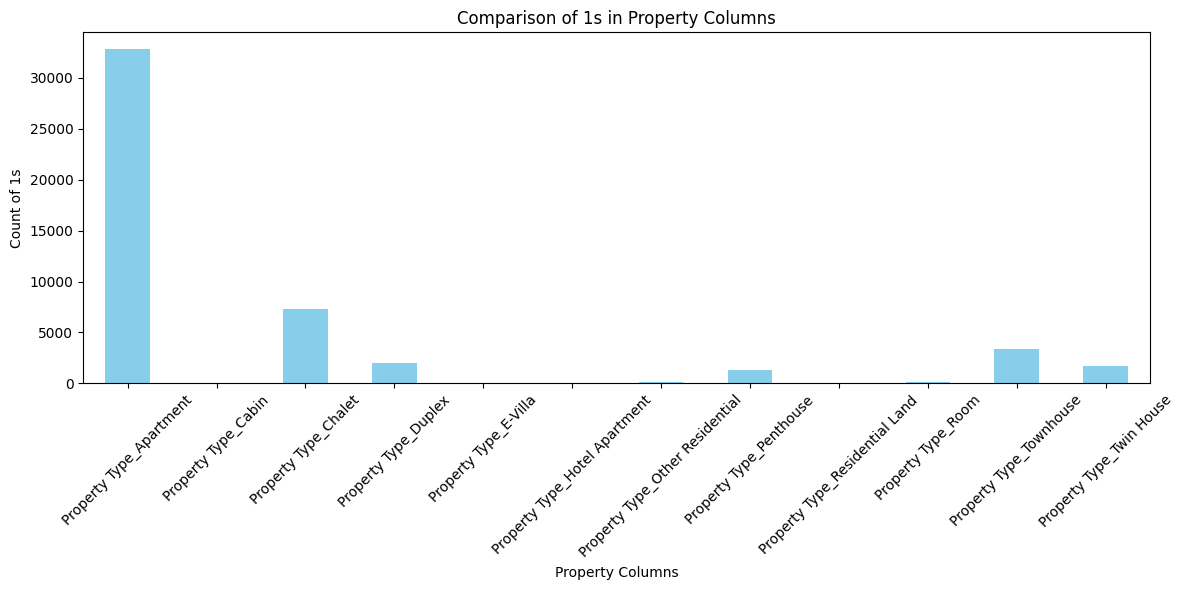

In [195]:

property_columns = [col for col in df_encoded.columns if col.startswith('Property')]

property_sums = df_encoded[property_columns].sum()

plt.figure(figsize=(12, 6))
property_sums.plot(kind='bar', color='skyblue')
plt.title('Comparison of 1s in Property Columns')
plt.xlabel('Property Columns')
plt.ylabel('Count of 1s')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [196]:
property_sums

Property Type_Apartment            32843
Property Type_Cabin                    1
Property Type_Chalet                7259
Property Type_Duplex                2005
Property Type_E-Villa                 28
Property Type_Hotel Apartment         11
Property Type_Other Residential      140
Property Type_Penthouse             1262
Property Type_Residential Land        21
Property Type_Room                   167
Property Type_Townhouse             3404
Property Type_Twin House            1739
dtype: int64

In [197]:
property_columns = [col for col in df_encoded.columns if col.startswith('Property')]

property_sums = df_encoded[property_columns].sum()

threshold = 1000

rare_property_columns = property_sums[property_sums < threshold].index




In [198]:
df_encoded_cleaned = df_encoded.drop(columns=rare_property_columns)

print("Columns dropped:", rare_property_columns)

Columns dropped: Index(['Property Type_Cabin', 'Property Type_E-Villa',
       'Property Type_Hotel Apartment', 'Property Type_Other Residential',
       'Property Type_Residential Land', 'Property Type_Room'],
      dtype='object')


In [199]:
df_encoded_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48880 entries, 0 to 48881
Data columns (total 30 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Price                               48880 non-null  float64
 1   Rooms                               48880 non-null  int64  
 2   Bathrooms                           48880 non-null  float64
 3   Area                                48880 non-null  float64
 4   Property Type_Apartment             48880 non-null  int64  
 5   Property Type_Chalet                48880 non-null  int64  
 6   Property Type_Duplex                48880 non-null  int64  
 7   Property Type_Penthouse             48880 non-null  int64  
 8   Property Type_Townhouse             48880 non-null  int64  
 9   Property Type_Twin House            48880 non-null  int64  
 10  Building Status_ready               48880 non-null  int64  
 11  Building Status_under construction  48880 non-

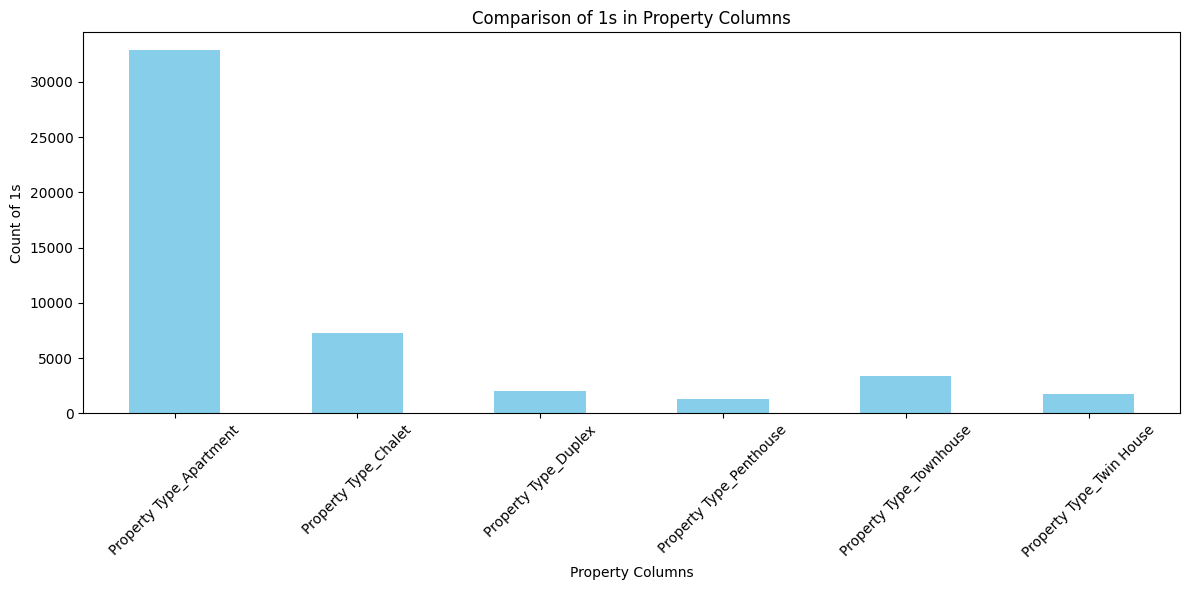

In [200]:

property_columns = [col for col in df_encoded_cleaned.columns if col.startswith('Property')]

property_sums = df_encoded_cleaned[property_columns].sum()

plt.figure(figsize=(12, 6))
property_sums.plot(kind='bar', color='skyblue')
plt.title('Comparison of 1s in Property Columns')
plt.xlabel('Property Columns')
plt.ylabel('Count of 1s')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


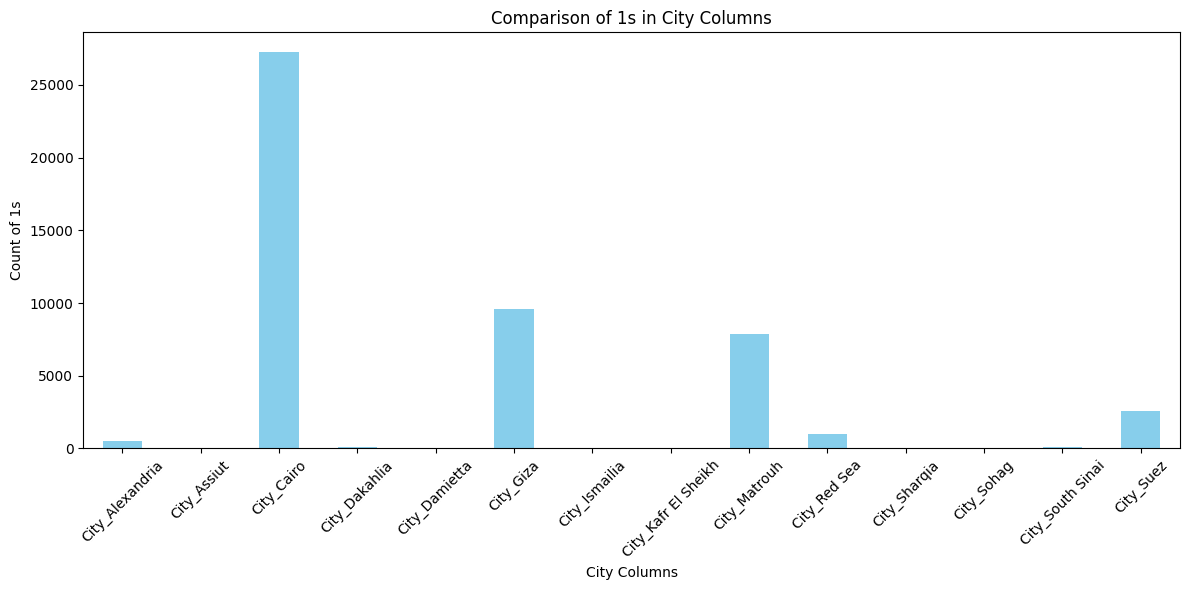

In [201]:

city_columns = [col for col in df_encoded_cleaned.columns if col.startswith('City')]

city_sums = df_encoded_cleaned[city_columns].sum()

plt.figure(figsize=(12, 6))
city_sums.plot(kind='bar', color='skyblue')
plt.title('Comparison of 1s in City Columns')
plt.xlabel('City Columns')
plt.ylabel('Count of 1s')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [202]:
city_columns = [col for col in df_encoded.columns if col.startswith('City')]

city_sums = df_encoded[city_columns].sum()

threshold = 1000

rare_city_columns = city_sums[city_sums < threshold].index

df_encoded_cleaned = df_encoded_cleaned.drop(columns=rare_city_columns)

print("Columns dropped:", rare_city_columns)


Columns dropped: Index(['City_Alexandria', 'City_Assiut', 'City_Dakahlia', 'City_Damietta',
       'City_Ismailia', 'City_Kafr El Sheikh', 'City_Red Sea', 'City_Sharqia',
       'City_Sohag', 'City_South Sinai'],
      dtype='object')


In [203]:
pd.set_option('display.width', None) 
pd.set_option('display.max_columns', None)  

df_encoded_cleaned.head()

,Price,Rooms,Bathrooms,Area,Property Type_Apartment,Property Type_Chalet,Property Type_Duplex,Property Type_Penthouse,Property Type_Townhouse,Property Type_Twin House,Building Status_ready,Building Status_under construction,Furnishing_Furnished,Furnishing_Unfurnished,Ownership_First Residence,Ownership_Resale,City_Cairo,City_Giza,City_Matrouh,City_Suez
0,14000000.0,5,2.0,154.0,1,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0
1,13000000.0,6,2.0,218.0,1,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0
2,7320000.0,6,1.0,72.0,1,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0
3,14632930.0,3,4.5,286.0,0,0,0,0,0,1,0,1,0,1,1,0,0,1,0,0
4,6800000.0,6,1.0,40.0,1,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0


In [204]:
df_encoded_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48880 entries, 0 to 48881
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Price                               48880 non-null  float64
 1   Rooms                               48880 non-null  int64  
 2   Bathrooms                           48880 non-null  float64
 3   Area                                48880 non-null  float64
 4   Property Type_Apartment             48880 non-null  int64  
 5   Property Type_Chalet                48880 non-null  int64  
 6   Property Type_Duplex                48880 non-null  int64  
 7   Property Type_Penthouse             48880 non-null  int64  
 8   Property Type_Townhouse             48880 non-null  int64  
 9   Property Type_Twin House            48880 non-null  int64  
 10  Building Status_ready               48880 non-null  int64  
 11  Building Status_under construction  48880 non-

In [205]:
from sklearn.model_selection import train_test_split

X = df_encoded_cleaned.drop(columns=['Price']) 
y = df_encoded_cleaned['Price']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [206]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model1 = LinearRegression()

model1.fit(X_train, y_train)

y_pred = model1.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 35557719825076.92
R-squared: 0.3754949002590737


In [207]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 32384427716466.77
R-squared: 0.43122786386145484


In [208]:
import joblib

joblib.dump(model, 'house_pricing_model.pkl')

print("Model saved as 'house_pricing_model.pkl'")


Model saved as 'house_pricing_model.pkl'


In [209]:
loaded_model = joblib.load('house_pricing_model.pkl')

example_input = X_test.iloc[0].values.reshape(1, -1) 
predicted_price = loaded_model.predict(example_input)

print(f"Predicted Price: {predicted_price[0]}")


Predicted Price: 9875343.136302976


C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
